In [1]:
import numpy as np

from optimize_sequence import optimize_sequence
from abdominal_tools import TargetTissue, AcquisitionBlock, MRFSequence, BLOCKS, create_weightingmatrix, visualize_sequence

In [2]:
prep_modules = ['noPrep', 'TI12', 'TI300', 'T2prep40', 'T2prep80', 'T2prep160']


In [3]:
target_tissue = TargetTissue(661.5, 56.8, 1)

In [4]:
weighting = '1/T1**2, 1/T2**2, 1/M0**2'

In [5]:
weightingmatrix = create_weightingmatrix(target_tissue, weighting)

In [6]:
prep_order_jaubert = ['TI12', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI300', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI12', 'noPrep']

In [7]:
acq_block_fa_jaubert = np.load('/home/tomgr/Documents/code/abdominal/fa_jaubert.npy')

In [8]:
acq_block_tr_jaubert = np.load('/home/tomgr/Documents/code/abdominal/tr_jaubert.npy')

In [9]:
waittimes_jaubert = [1.2e3 - BLOCKS[name]['ti'] - BLOCKS[name]['t2te'] - sum(acq_block_tr_jaubert) for name in prep_order_jaubert]

In [10]:
acq_block = AcquisitionBlock(acq_block_fa_jaubert, acq_block_tr_jaubert, 1.4)

In [11]:
mrf_sequence_jaubert = MRFSequence(prep_order_jaubert, waittimes_jaubert, acq_block)

In [12]:
mrf_sequence_jaubert.calc_crlb(target_tissue)

In [20]:
count, sequences, timestamp, duration = optimize_sequence(target_tissue, acq_block, mrf_sequence_jaubert, prep_modules, weightingmatrix)

In [21]:
mrf_sequence_jaubert.crlb

array([[ 8.21581089e+05, -1.25869757e+04,  7.65314401e+02],
       [-1.25869757e+04,  2.92064989e+04, -4.11397038e+01],
       [ 7.65314401e+02, -4.11397038e+01,  1.10324261e+00]])

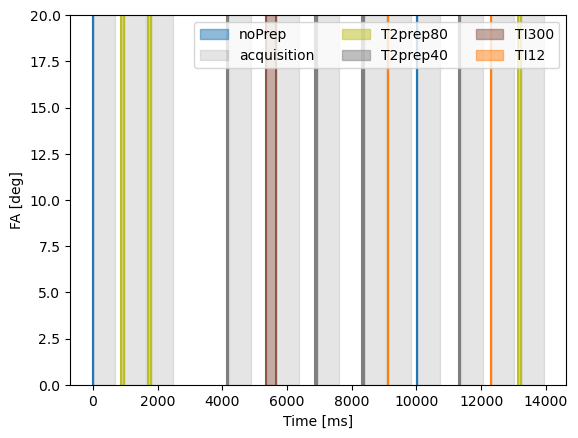

In [22]:
visualize_sequence(sequences[0])

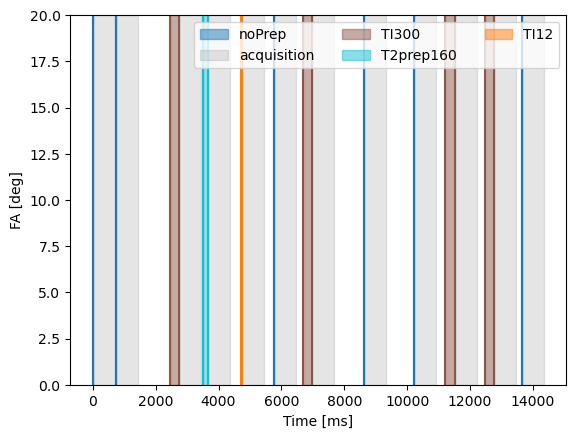

In [24]:
visualize_sequence(sequences[-1])

In [18]:
sequences[-1].crlb

array([[ 5.57167131e+05, -5.61811888e+04,  5.37930554e+02],
       [-5.61811888e+04,  1.77676742e+05,  3.30839062e+01],
       [ 5.37930554e+02,  3.30839062e+01,  1.04967065e+00]])

In [19]:
sequences[0].crlb

array([[ 7.71987596e+05, -7.63664305e+03,  6.05745582e+02],
       [-7.63664305e+03,  2.55960382e+04, -2.78839137e+01],
       [ 6.05745582e+02, -2.78839137e+01,  8.26046288e-01]])